In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

from utils import kraken_ex as kex

In [2]:
print('github is driving me nuts')

github is driving me nuts


In [2]:
btc = kex.pull_data('BTC')

btc.head()

Pulled _BTC at 2021-10-18 20:41:24.028601


,time,open_BTC,high_BTC,low_BTC,close_BTC,vwap_BTC,volume_BTC,count_BTC,log_high_BTC,log_low_BTC,log_vwap_BTC
dtime,,,,,,,,,,,
2021-10-19,1634601600,62009.6,62287.0,61692.9,61781.8,61947.0,213.622508,2582,11.039508,11.029924,11.034034
2021-10-18,1634515200,61526.1,62672.6,59900.0,62037.7,61711.6,3406.190564,35225,11.045680,11.000432,11.030227
2021-10-17,1634428800,60868.5,61674.3,58900.2,61526.5,60535.8,2142.264440,28374,11.029623,10.983600,11.010990
2021-10-16,1634342400,61669.8,62400.0,60162.0,60873.4,61210.1,1963.728064,24961,11.041321,11.004796,11.022067
2021-10-15,1634256000,57357.1,62887.5,56888.5,61656.2,60314.9,5171.657687,53746,11.049103,10.948848,11.007334


In [4]:
import pmdarima as pm

pm.acf(btc)

TypeError: acf() got an unexpected keyword argument 'unbiased'

In [6]:
btc_forecast = pm.auto_arima(btc['vwap_BTC'],
                            start_p = 1,
                            start_q = 1,
                            max_p = 5,
                            max_q = 5,
                            d = 1,
                            error_action = 'ignore',
                            suppress_warnings = True,
                            stepwise = True)

In [7]:
btc_forecast.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -6039.290
Date:                Mon, 18 Oct 2021   AIC                          12084.580
Time:                        20:43:40   BIC                          12098.314
Sample:                             0   HQIC                         12089.883
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -63.0920     43.231     -1.459      0.144    -147.823      21.639
ma.L1          0.0674      0.012      5.460      0.000       0.043       0.092
sigma2      1.142e+06   3.11e+04     36.700      0.000    1.08e+06     1.2e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.13   Jarque-Bera (JB):              1015.22
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2915.873, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2954.975, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2947.028, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2940.108, Time=0.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2915.651, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2986.348, Time=0.03 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2915.275, Time=0.29 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2918.411, Time=0.28 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2925.080, Time=0.31 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2911.330, Time=0.21 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2911.555, Time=0.07 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2914.196, Time=0.25 sec
 ARIMA(2,1,1)(1,0,1

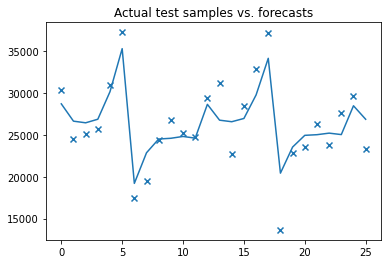

In [9]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [10]:
btc.shape

(720, 11)

In [11]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error

In [20]:
720*0.75

540.0

In [29]:
train, test = model_selection.train_test_split(btc['vwap_BTC'], train_size = 540)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(btc['vwap_BTC'], test_size = 0.25,
                              shuffle = False)

print(train.shape)
print(test.shape)

assert train.shape[0] + test.shape[0] == btc.shape[0]

(540,)
(180,)


In [32]:
modl = pm.auto_arima(train,
                    start_p = 1,
                    start_q = 1,
                    max_p = 5,
                    max_q = 5,
                    stepwise = True,
                    suppress_warnings=True,
                    error_action = 'ignore')

preds, conf_int = modl.predict(n_periods = test.shape[0],
                              return_conf_int = True)

print(f'Test RMSE: {np.sqrt(mean_squared_error(test, preds)):.3f}')

Test RMSE: 9504.450


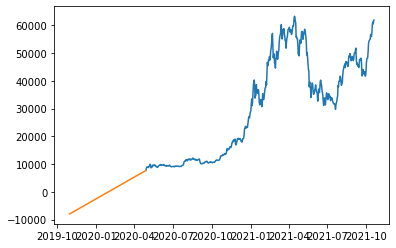

In [33]:
'''
x_axis = np.arange(train.shape[0] + preds.shape[0])

plt.plot(btc[x_axis[:train.shape[0]]], train, alpha = 0.75)
plt.plot(btc[x_axis[train.shape[0]:]], preds, alpha = 0.75)

plt.fill_between(btc[x_axis[-preds.shape[0]:]],
                conf_int[:, 0],
                conf_int[:, 1],
                alpha = 0.1,
                color = 'b')
'''

plt.plot(train.index, train)
plt.plot(test.index, preds)

In [34]:
train.head()

dtime
2021-10-19    61947.0
2021-10-18    61711.6
2021-10-17    60535.8
2021-10-16    61210.1
2021-10-15    60314.9
Freq: -1440T, Name: vwap_BTC, dtype: float64

In [35]:
test.head()

dtime
2020-04-27    7716.1
2020-04-26    7613.5
2020-04-25    7557.8
2020-04-24    7516.0
2020-04-23    7413.9
Freq: -1440T, Name: vwap_BTC, dtype: float64

Test RMSE: 1258.625


Text(0.5, 0, 'Year')

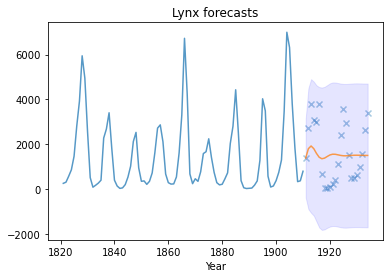

In [36]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
train, test = model_selection.train_test_split(data, train_size=90)

# Fit a simple auto_arima model
modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# Create predictions for the future, evaluate on test
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1821  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Lynx forecasts")
plt.xlabel("Year")